### Assignment - 1

#### 1. Load and Inspect the CMAPSS Dataset
Task:
- Write Python code to load the raw `train_FD001.txt` dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
- Expected Output: DataFrame shape, info, and sample rows.

Use the link to download the dataset:
https://data.nasa.gov/dataset/cmapss-jet-engine-simulated-data

In [10]:
# 1. Imports
import pandas as pd

# 2. Define the path to your dataset
url = "https://raw.githubusercontent.com/springboard135-infosys-intern-oct25/prognosAI-Infosys-intern-project/main/data/train_FD001.txt"

# The dataset has 26 columns in total:
#1st column → engine_id (engine number)
#2nd column → cycle (time or operational cycle)
#Next 3 columns → operational settings (op_setting_1, op_setting_2, op_setting_3)
#Remaining 21 columns → sensor readings from sensor_1 to sensor_21
column_names = [
    "engine_id", "cycle", "op_setting_1", "op_setting_2", "op_setting_3"
] + [f"sensor_{i}" for i in range(1, 22)]

# 4. Load the dataset
df = pd.read_csv(url, sep=r"\s+", header=None, names=column_names)

# 5. Display dataset shape, info, and first 5 rows
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nSample Rows:")
print(df.head())


Dataset Shape: (20631, 26)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  int64  
 1   cycle         20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-nul

#### 2. Visualize Sensor Distributions and Identify Missing Values
Task:
- Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
- Expected Output: Three histogram plots and a summary/report on missing values per column.

Missing Values in Each Column:
 engine_id                0
cycle                    0
op_setting_1             0
op_setting_2             0
op_setting_3             0
sensor_1                 0
sensor_2                 0
sensor_3                 0
sensor_4                 0
sensor_5                 0
sensor_6                 0
sensor_7                 0
sensor_8                 0
sensor_9                 0
sensor_10                0
sensor_11                0
sensor_12                0
sensor_13                0
sensor_14                0
sensor_15                0
sensor_16                0
sensor_17                0
sensor_18                0
sensor_19                0
sensor_20                0
sensor_21                0
sensor_2_mean_x          0
sensor_2_std_x           0
sensor_2_rolling_mean    0
sensor_2_mean_y          0
sensor_2_std_y           0
dtype: int64


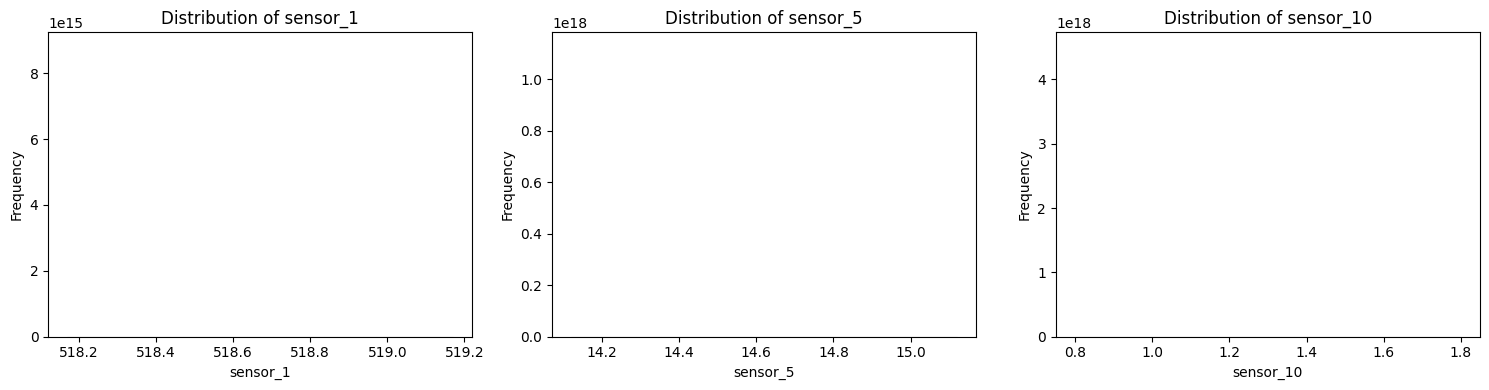

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = cmapss_df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

#Visualize Distributions for Three Sensors
selected_sensors = ['sensor_1', 'sensor_5', 'sensor_10']

plt.figure(figsize=(15, 4))
for i, sensor in enumerate(selected_sensors, 1):
    plt.subplot(1, 3, i)
    sns.histplot(cmapss_df[sensor], kde=True, bins=30, color='orange')
    plt.title(f"Distribution of {sensor}")
    plt.xlabel(sensor)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


#### 3. Feature Engineering – Aggregation and Rolling Statistics
Task:
- For a selected sensor (e.g., `sensor_2`), compute and append to the DataFrame:
  - The mean and standard deviation of `sensor_2` by each `engine_id`

  - The rolling mean (window size=5) for each engine’s `sensor_2` readings
- Expected Output: Show a few sample rows with these new features.

In [12]:
import pandas as pd
#Compute Mean and Standard Deviation of sensor_2 per engine
engine_stats = cmapss_df.groupby("engine_id")["sensor_2"].agg(['mean', 'std']).reset_index()
engine_stats.rename(columns={'mean': 'sensor_2_mean', 'std': 'sensor_2_std'}, inplace=True)

# Merge these new stats back into the main DataFrame
cmapss_df = cmapss_df.merge(engine_stats, on="engine_id", how="left")

#Compute Rolling Mean (window size = 5) for sensor_2
cmapss_df["sensor_2_rolling_mean"] = cmapss_df.groupby("engine_id")["sensor_2"].rolling(window=5, min_periods=1).mean().reset_index(0, drop=True)

#Display a few sample rows
print("\nSample Rows with New Features:\n")
print(cmapss_df[["engine_id", "cycle", "sensor_2", "sensor_2_mean", "sensor_2_std", "sensor_2_rolling_mean"]].head(10))



Sample Rows with New Features:

   engine_id  cycle  sensor_2  sensor_2_mean  sensor_2_std  \
0          1      1    641.82     642.621042      0.486795   
1          1      2    642.15     642.621042      0.486795   
2          1      3    642.35     642.621042      0.486795   
3          1      4    642.35     642.621042      0.486795   
4          1      5    642.37     642.621042      0.486795   
5          1      6    642.10     642.621042      0.486795   
6          1      7    642.48     642.621042      0.486795   
7          1      8    642.56     642.621042      0.486795   
8          1      9    642.12     642.621042      0.486795   
9          1     10    641.71     642.621042      0.486795   

   sensor_2_rolling_mean  
0             641.820000  
1             641.985000  
2             642.106667  
3             642.167500  
4             642.208000  
5             642.264000  
6             642.330000  
7             642.372000  
8             642.326000  
9             

#### 4. Data Normalization
Task:
- Normalize all sensor columns in the DataFrame using `StandardScaler` from `scikit-learn` (zero mean, unit variance) and create a new DataFrame, maintaining the original `engine_id` and `cycle` columns.
- Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

#Select only sensor columns for normalization
sensor_columns = [f"sensor_{i}" for i in range(1, 22)]
sensor_data = cmapss_df[sensor_columns]

#Apply StandardScaler (zero mean, unit variance)
scaler = StandardScaler()
normalized_sensors = scaler.fit_transform(sensor_data)

# Convert back to a DataFrame
normalized_df = pd.DataFrame(normalized_sensors, columns=sensor_columns)

#Add engine_id and cycle columns back
normalized_df.insert(0, "engine_id", cmapss_df["engine_id"])
normalized_df.insert(1, "cycle", cmapss_df["cycle"])

#Check normalization results
print("\nHead of Normalized DataFrame:\n")
print(normalized_df.head())
print("\nCheck Mean and Standard Deviation After Normalization:\n")
print("Mean (should be close to 0):")
print(normalized_df[sensor_columns].mean().round(2))
print("\nStandard Deviation (should be close to 1):")
print(normalized_df[sensor_columns].std().round(2))



Head of Normalized DataFrame:

   engine_id  cycle  sensor_1  sensor_2  sensor_3  sensor_4      sensor_5  \
0          1      1       0.0 -1.721725 -0.134255 -0.925936 -1.776357e-15   
1          1      2       0.0 -1.061780  0.211528 -0.643726 -1.776357e-15   
2          1      3       0.0 -0.661813 -0.413166 -0.525953 -1.776357e-15   
3          1      4       0.0 -0.661813 -1.261314 -0.784831 -1.776357e-15   
4          1      5       0.0 -0.621816 -1.251528 -0.301518 -1.776357e-15   

   sensor_6  sensor_7  sensor_8  ...  sensor_12  sensor_13  sensor_14  \
0  0.141683  1.121141 -0.516338  ...   0.334262  -1.058890  -0.269071   
1  0.141683  0.431930 -0.798093  ...   1.174899  -0.363646  -0.642845   
2  0.141683  1.008155 -0.234584  ...   1.364721  -0.919841  -0.551629   
3  0.141683  1.222827  0.188048  ...   1.961302  -0.224597  -0.520176   
4  0.141683  0.714393 -0.516338  ...   1.052871  -0.780793  -0.521748   

   sensor_15     sensor_16  sensor_17  sensor_18  sensor_19  senso

#### 5. Rolling Window Sequence Generation
Task:
- Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
- Expected Output: Array shape, example content, and confirmation of successful file saves.